In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor

## Import Data

In [2]:
carData = pd.read_csv('SG_usedcar.csv')
carData = carData.drop(['Reg_date','Dep','Road Tax','COE','Curb Weight','Manufactured','Transmission','OMV','ARF','Power'],axis=1)

In [3]:
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,Engine Cap,No. of Owners,Price
0,BMW 5 Series 520i Highline,Luxury Sedan,1yr 11mths 21days COE left),N.A,38133,1997,1,54000
1,Honda Vezel 1.5A X Honda Sensing,SUV,4yrs 4mths 7days COE left),50000,31237,1496,2,49800
2,MINI One 1.6A (New 10-yr COE),Hatchback,10yrs COE left),110000,N.A,1598,3,62800
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,7yrs 8mths 5days COE left),N.A,N.A,1591,3,N.A
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,1yr 6mths 21days COE left),203000,6656,1586,2,12800


## Change N.A to nan

In [4]:
carData = carData.replace('N.A',np.nan)
carData = carData.replace('N.A.',np.nan)
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4396 non-null   object
 1   Type           4396 non-null   object
 2   Coe_left       4388 non-null   object
 3   Mileage        2840 non-null   object
 4   Dereg Value    3446 non-null   object
 5   Engine Cap     4393 non-null   object
 6   No. of Owners  4339 non-null   object
 7   Price          3676 non-null   object
dtypes: object(8)
memory usage: 274.9+ KB


In [5]:
# get the number of missing data points per column
missing_values_count = carData.isnull().sum()
missing_values_count

Brand               0
Type                0
Coe_left            8
Mileage          1556
Dereg Value       950
Engine Cap          3
No. of Owners      57
Price             720
dtype: int64

## Removing missing values

In [6]:
carData.dropna(subset=['Brand','Type','Coe_left','Mileage','Dereg Value','Engine Cap','No. of Owners','Price'], inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 1 to 4394
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          2631 non-null   object
 1   Type           2631 non-null   object
 2   Coe_left       2631 non-null   object
 3   Mileage        2631 non-null   object
 4   Dereg Value    2631 non-null   object
 5   Engine Cap     2631 non-null   object
 6   No. of Owners  2631 non-null   object
 7   Price          2631 non-null   object
dtypes: object(8)
memory usage: 185.0+ KB


In [7]:
carData.fillna(0, inplace=True)
carData.info()

,Brand,Type,Coe_left,Mileage,Dereg Value,Engine Cap,No. of Owners,Price
count,2631,2631,2631,2631,2631,2631,2631,2631
unique,1306,10,1477,1236,2412,156,6,938
top,Mercedes-Benz C-Class C180 Avantgarde,SUV,7yrs 10mths 24days COE left),120000,27989,1998,1,59800
freq,41,572,24,31,16,223,1412,45


In [8]:
for i,v in enumerate(carData.Brand):
    wordstr = v.split()
    carData['Brand'].loc[i] = str(wordstr[0]) 

In [9]:
# Function to extract main brand
def extract_main_brand(brand):
    if isinstance(brand, str):
        return brand.split()[0]
    else:
        return np.nan

# Extract main brands from the 'Brand' column
carData['Brand'] = carData['Brand'].apply(extract_main_brand)

# Display the modified DataFrame
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,Engine Cap,No. of Owners,Price
1,Suzuki,SUV,4yrs 4mths 7days COE left),50000,31237,1496,2,49800
4,Kia,Hatchback,1yr 6mths 21days COE left),203000,6656,1586,2,12800
5,BMW,Sports Car,6yrs 1mth 12days COE left),21000,106829,1988,1,259988
13,Honda,Mid-Sized Sedan,3yrs 5mths 7days COE left),35000,31339,1591,1,44800
15,BMW,Mid-Sized Sedan,8yrs 27days COE left),21200,38416,1591,1,85800


In [10]:
carData['Brand'].value_counts()

Brand
Mercedes-Benz    432
Honda            359
Toyota           357
BMW              258
Nissan           130
Audi             120
Mitsubishi       120
Mazda            118
Volkswagen       114
Hyundai           91
Kia               72
Porsche           58
Subaru            57
Lexus             50
Volvo             37
MINI              33
Suzuki            28
Opel              16
Chevrolet         15
Bentley           15
Land              14
Peugeot           14
SEAT              13
Skoda             11
Ford              10
Citroen            9
Ferrari            9
McLaren            9
Lamborghini        8
Maserati           8
Renault            7
Hino               7
Fiat               6
Infiniti           5
Isuzu              5
Jaguar             4
Cadillac           2
Perodua            2
Jeep               2
Proton             2
Rolls-Royce        2
Hummer             1
Alfa               1
Name: count, dtype: int64

In [11]:
# Function to convert COE left to months
def coe_to_months(coe):
    if isinstance(coe, str):
        coe_parts = coe.split()
        total_months = 0
        for part in coe_parts:
            if 'yr' in part or 'yrs' in part:
                total_months += int(part.strip('yrs').strip('yr')) * 12
            elif 'mth' in part or 'mths' in part:
                total_months += int(part.strip('mths').strip('mth'))
        return total_months
    else:
        return np.nan

# Convert 'Coe_left' to months
carData['Coe_left'] = carData['Coe_left'].apply(coe_to_months)

# Display the modified DataFrame
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,Engine Cap,No. of Owners,Price
1,Suzuki,SUV,52,50000,31237,1496,2,49800
4,Kia,Hatchback,18,203000,6656,1586,2,12800
5,BMW,Sports Car,73,21000,106829,1988,1,259988
13,Honda,Mid-Sized Sedan,41,35000,31339,1591,1,44800
15,BMW,Mid-Sized Sedan,96,21200,38416,1591,1,85800


In [12]:
carData.columns

Index(['Brand', 'Type', 'Coe_left', 'Mileage', 'Dereg Value', 'Engine Cap',
       'No. of Owners', 'Price'],
      dtype='object')

In [13]:
# create a list of fields to be converted to int
convert_dict = {'Mileage': 'int64','No. of Owners': 'int64','Price': 'int64',
                'Dereg Value':'int64','Engine Cap':'int64','Type':'category'}

In [14]:
carData = carData.astype(convert_dict)

In [15]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 1 to 4394
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Brand          2631 non-null   object  
 1   Type           2631 non-null   category
 2   Coe_left       2631 non-null   int64   
 3   Mileage        2631 non-null   int64   
 4   Dereg Value    2631 non-null   int64   
 5   Engine Cap     2631 non-null   int64   
 6   No. of Owners  2631 non-null   int64   
 7   Price          2631 non-null   int64   
dtypes: category(1), int64(6), object(1)
memory usage: 231.9+ KB


In [16]:
carDF=pd.DataFrame(carData[['Brand','Type','Coe_left']])
carDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 1 to 4394
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Brand     2631 non-null   object  
 1   Type      2631 non-null   category
 2   Coe_left  2631 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 129.1+ KB


In [17]:
carDF.describe()

,Coe_left
count,2631.000000
mean,71.064614
std,28.130853
min,0.000000
25%,53.000000
50%,72.000000
75%,94.000000
max,119.000000


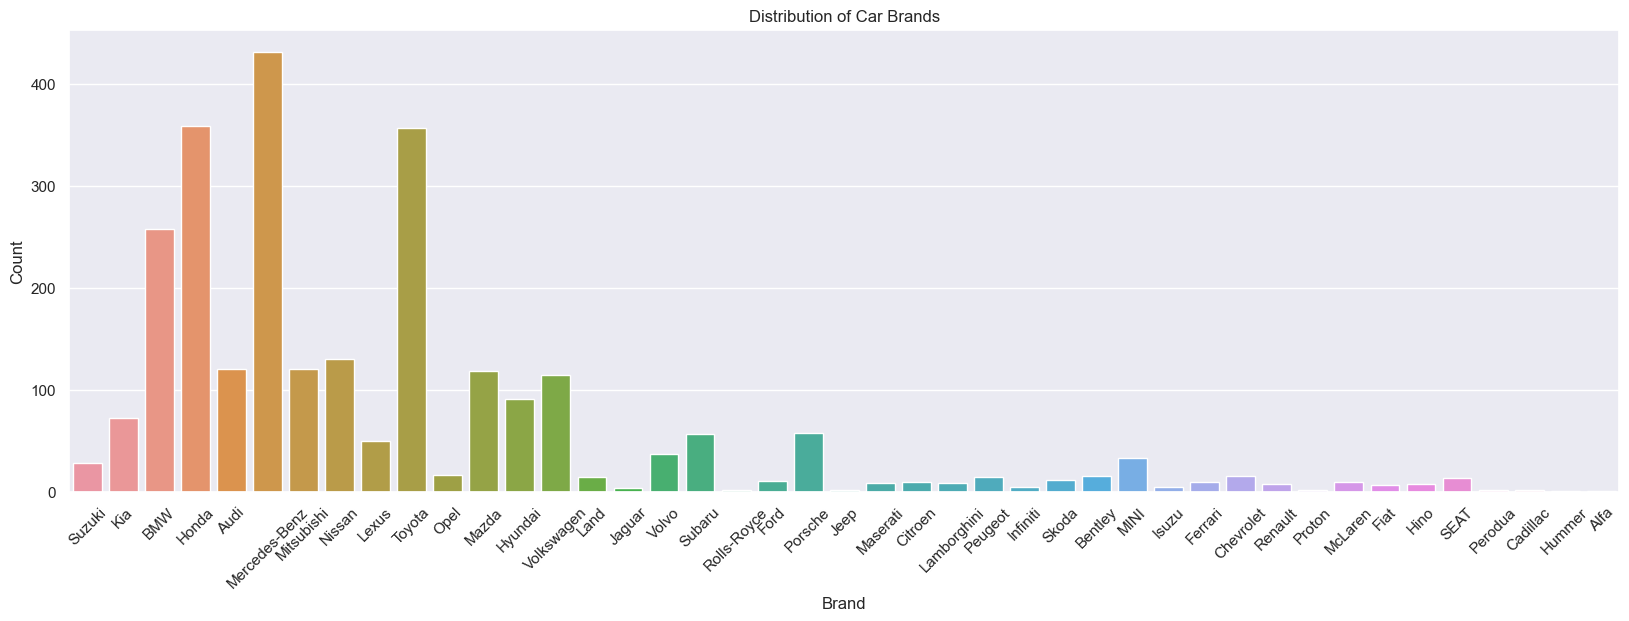

In [18]:
plt.figure(figsize=(20, 6))
sb.countplot(x='Brand', data=carDF)
plt.title('Distribution of Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

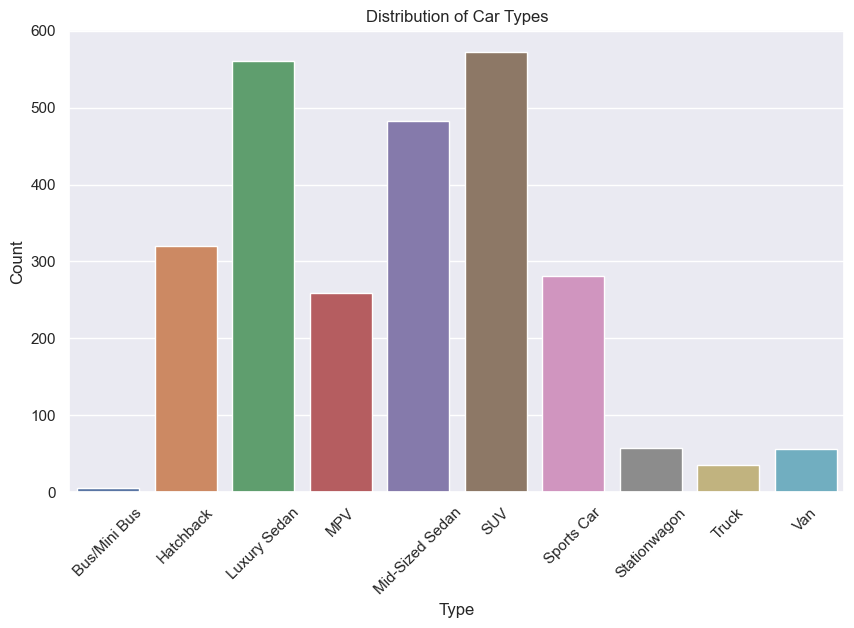

In [19]:
plt.figure(figsize=(10, 6))
sb.countplot(x='Type', data=carDF)
plt.title('Distribution of Car Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

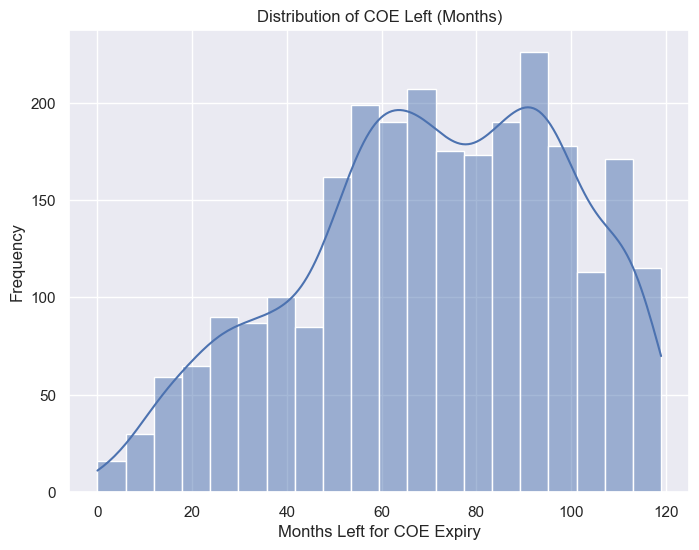

In [20]:
plt.figure(figsize=(8, 6))
sb.histplot(carDF['Coe_left'], bins=20, kde=True)
plt.title('Distribution of COE Left (Months)')
plt.xlabel('Months Left for COE Expiry')
plt.ylabel('Frequency')
plt.show()


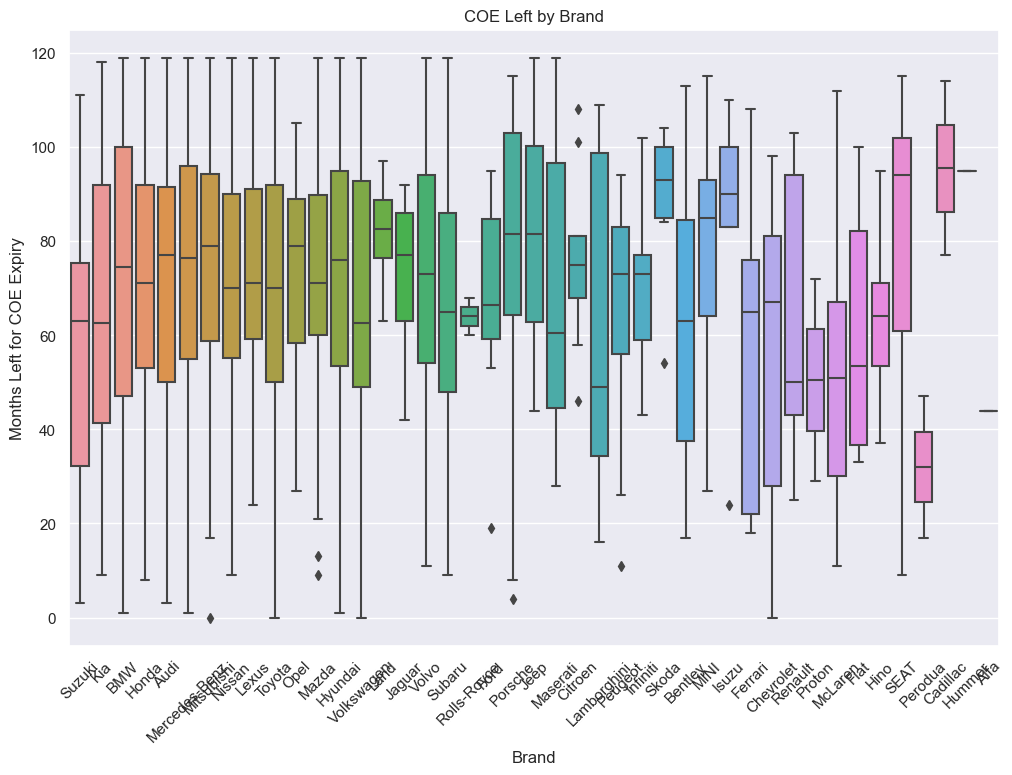

In [21]:
plt.figure(figsize=(12, 8))
sb.boxplot(x='Brand', y='Coe_left', data=carDF)
plt.title('COE Left by Brand')
plt.xlabel('Brand')
plt.ylabel('Months Left for COE Expiry')
plt.xticks(rotation=45)
plt.show()


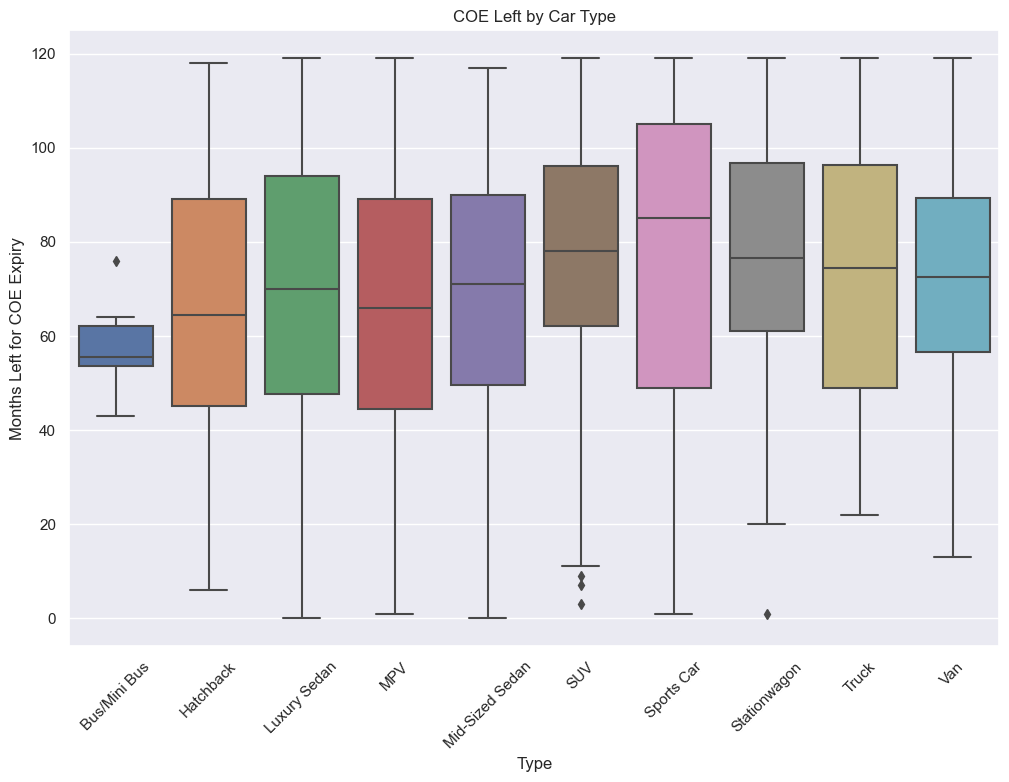

In [22]:
plt.figure(figsize=(12, 8))
sb.boxplot(x='Type', y='Coe_left', data=carDF)
plt.title('COE Left by Car Type')
plt.xlabel('Type')
plt.ylabel('Months Left for COE Expiry')
plt.xticks(rotation=45)
plt.show()


In [23]:
X_brand = carData[['Brand']]  # Predictor variable
y_brand = carData['Price']       # Target variable

X_type = carData[['Type']]      # Predictor variable
y_type = carData['Price']         # Target variable

X_coe = carData[['Coe_left']]      # Predictor variable
y_coe = carData['Price']         # Target variable


In [24]:
encoder = OneHotEncoder()
X_brand_encoded = encoder.fit_transform(X_brand)
X_type_encoded = encoder.fit_transform(X_type)

In [25]:
X_brand_train, X_brand_test, y_brand_train, y_brand_test = train_test_split(X_brand_encoded, y_brand, test_size=0.25, random_state=0)
X_type_train, X_type_test, y_type_train, y_type_test = train_test_split(X_type_encoded, y_type, test_size=0.25, random_state=0)
X_coe_train, X_coe_test, y_coe_train, y_coe_test = train_test_split(X_coe, y_coe, test_size=0.25, random_state=0)


In [26]:
# Create linear regression models
reg_brand = LinearRegression()
reg_type = LinearRegression()
reg_coe = LinearRegression()

# Fit the models
reg_brand.fit(X_brand_train, y_brand_train)
reg_type.fit(X_type_train, y_type_train)
reg_coe.fit(X_coe_train, y_coe_train)

# Predictions
y_brand_pred = reg_brand.predict(X_brand_test)
y_type_pred = reg_type.predict(X_type_test)
y_coe_pred = reg_coe.predict(X_coe_test)



In [27]:
# Calculate MSE and R^2 for each predictor
mse_brand = mean_squared_error(y_brand_test, y_brand_pred)
r2_brand = r2_score(y_brand_test, y_brand_pred)

mse_type = mean_squared_error(y_type_test, y_type_pred)
r2_type = r2_score(y_type_test, y_type_pred)

mse_coe = mean_squared_error(y_coe_test, y_coe_pred)
r2_coe = r2_score(y_coe_test, y_coe_pred)

print("Brand Predictor:")
print("MSE:", mse_brand)
print("R^2:", r2_brand)

print("\nType Predictor:")
print("MSE:", mse_type)
print("R^2:", r2_type)

print("\nCOE Left Predictor:")
print("MSE:", mse_coe)
print("R^2:", r2_coe)

Brand Predictor:
MSE: 11944536516.533754
R^2: 0.010409878114471471

Type Predictor:
MSE: 10231988484.58643
R^2: 0.1522923708611531

COE Left Predictor:
MSE: 11067720916.373367
R^2: 0.0830529694083686


In [28]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
carData_cat = carData[['Brand','Type']]
ohe.fit(carData_cat)
carData_cat_ohe = pd.DataFrame(ohe.transform(carData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(carData_cat.columns))

# Check the encoded variables
carData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2631 entries, 0 to 2630
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand_Alfa            2631 non-null   float64
 1   Brand_Audi            2631 non-null   float64
 2   Brand_BMW             2631 non-null   float64
 3   Brand_Bentley         2631 non-null   float64
 4   Brand_Cadillac        2631 non-null   float64
 5   Brand_Chevrolet       2631 non-null   float64
 6   Brand_Citroen         2631 non-null   float64
 7   Brand_Ferrari         2631 non-null   float64
 8   Brand_Fiat            2631 non-null   float64
 9   Brand_Ford            2631 non-null   float64
 10  Brand_Hino            2631 non-null   float64
 11  Brand_Honda           2631 non-null   float64
 12  Brand_Hummer          2631 non-null   float64
 13  Brand_Hyundai         2631 non-null   float64
 14  Brand_Infiniti        2631 non-null   float64
 15  Brand_Isuzu          

In [29]:
# Combining Numeric features with the OHE Categorical features
carData_num = carData[['Coe_left','Dereg Value', 'Engine Cap', 'No. of Owners', 'Price']]
carData_res = carData['Price']

# Reset index for all DataFrames
carData_num.reset_index(drop=True, inplace=True)
carData_cat_ohe.reset_index(drop=True, inplace=True)
carData_res.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames
carData_ohe = pd.concat([carData_num, carData_cat_ohe, carData_res], axis=1)

# Check the final dataframe
carData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2631 entries, 0 to 2630
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Coe_left              2631 non-null   int64  
 1   Dereg Value           2631 non-null   int64  
 2   Engine Cap            2631 non-null   int64  
 3   No. of Owners         2631 non-null   int64  
 4   Price                 2631 non-null   int64  
 5   Brand_Alfa            2631 non-null   float64
 6   Brand_Audi            2631 non-null   float64
 7   Brand_BMW             2631 non-null   float64
 8   Brand_Bentley         2631 non-null   float64
 9   Brand_Cadillac        2631 non-null   float64
 10  Brand_Chevrolet       2631 non-null   float64
 11  Brand_Citroen         2631 non-null   float64
 12  Brand_Ferrari         2631 non-null   float64
 13  Brand_Fiat            2631 non-null   float64
 14  Brand_Ford            2631 non-null   float64
 15  Brand_Hino           

In [30]:
# Extract Response and Predictors
y = pd.DataFrame(carData_ohe['Price'])
X = pd.DataFrame(carData_ohe.drop('Price', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [31]:
# Create the Random Forest object
rforest = RandomForestRegressor(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree
rforest.fit(X_train, y_train)

RandomForestRegressor(max_depth=4)

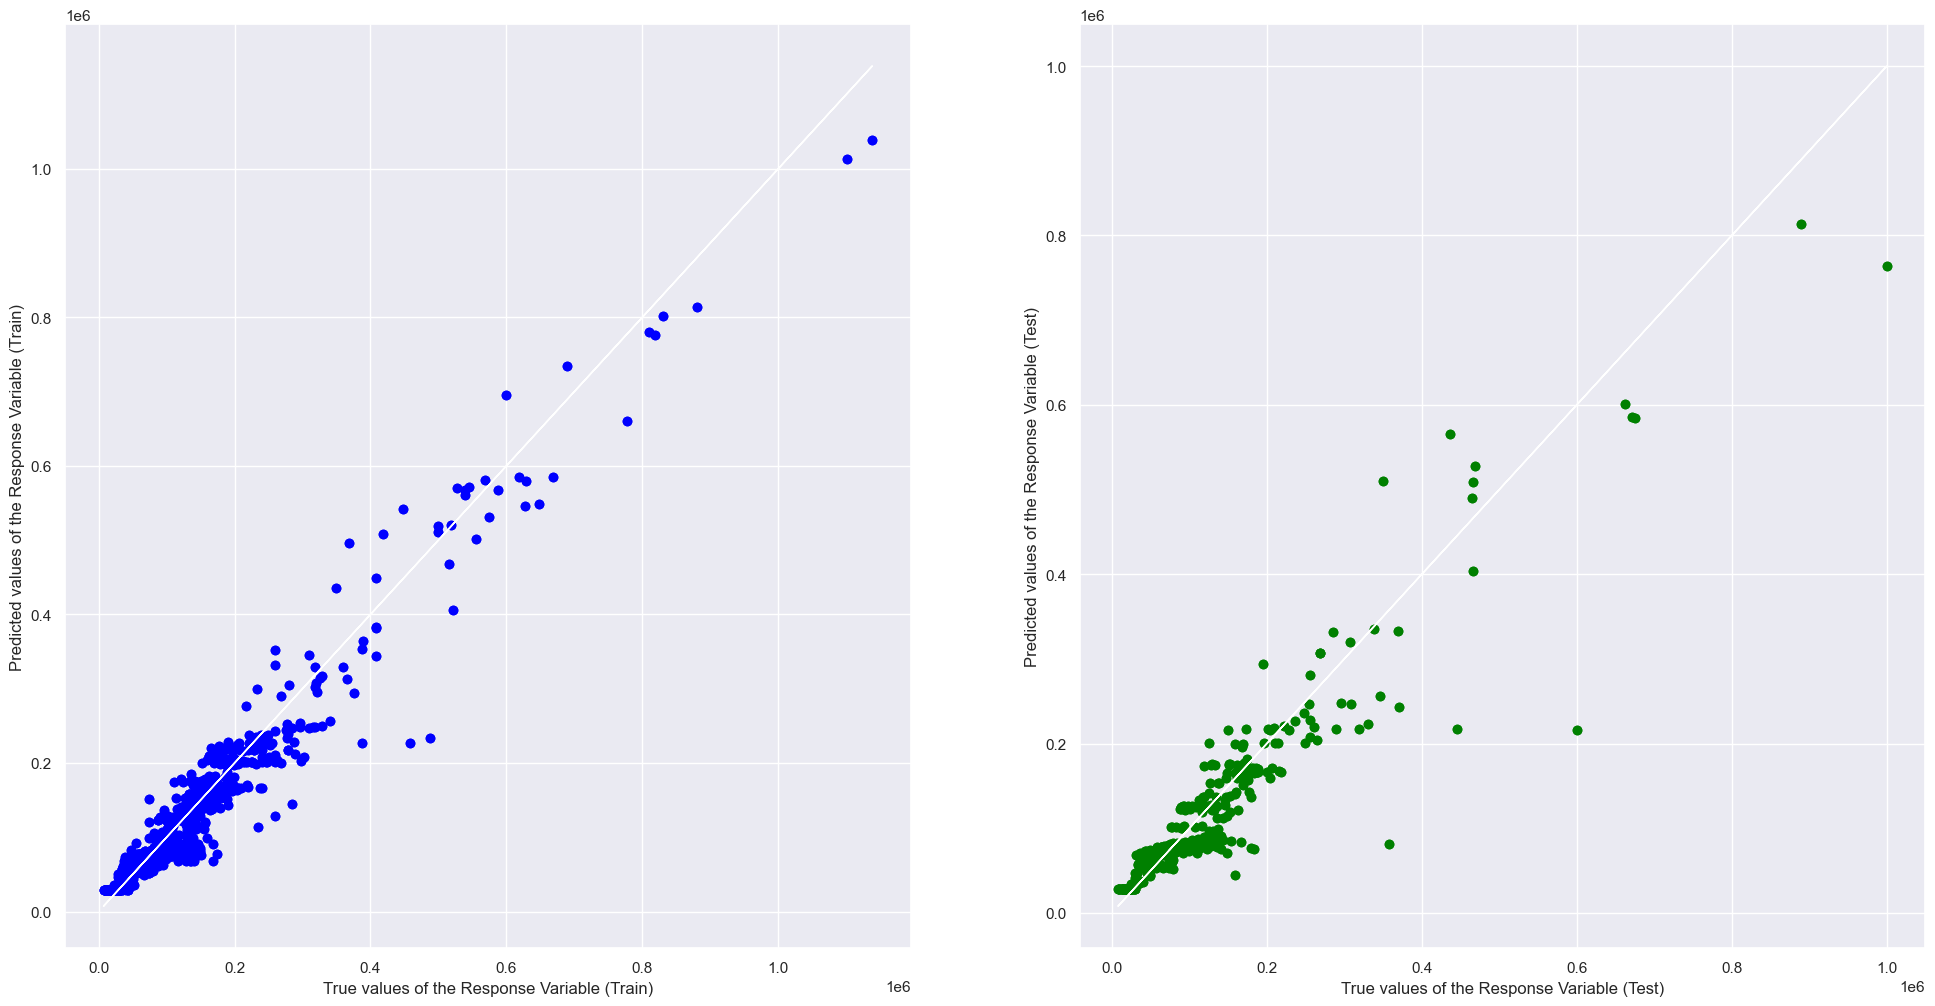

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9306075779658571
Mean Squared Error (MSE) 	: 593529631.0482676

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8652596691534573
Mean Squared Error (MSE) 	: 1174403933.3652055


In [32]:
# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color="blue")
axes[0].plot(y_train, y_train, 'w-', linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color="green")
axes[1].plot(y_test, y_test, 'w-', linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rforest.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rforest.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
